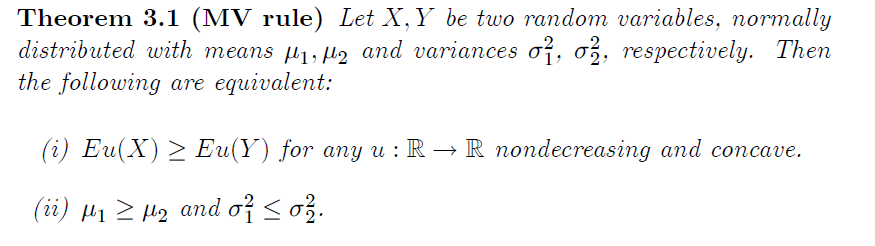

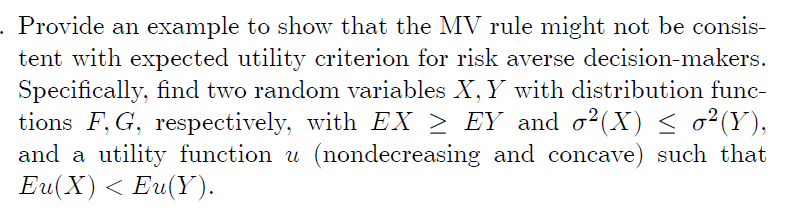

E[X]    = 1.4999, E[Y]    = 1.4997
Var(X)  = 0.2838, Var(Y)  = 0.3333
E[ln X] = 0.2994, E[ln Y] = 0.3185


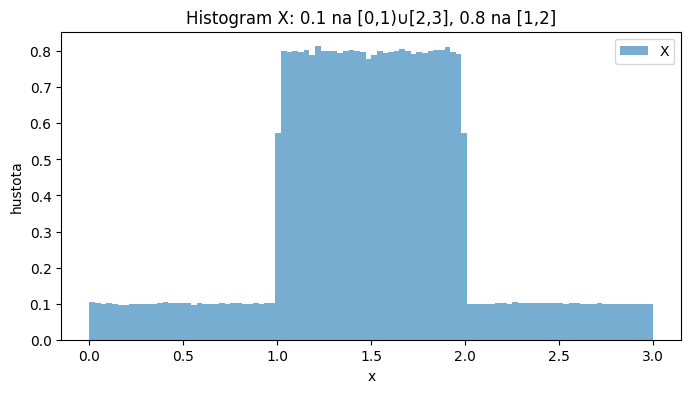

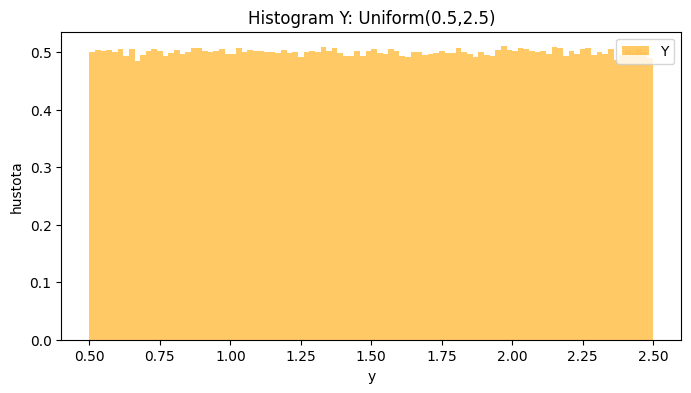

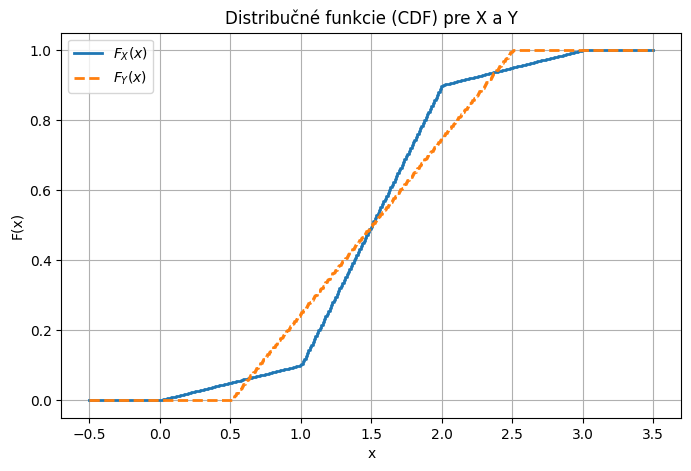

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Počet náhodných vzoriek
N = 1_000_000

# 1) Simulácia náhodnej premennej X s hustotou
#    f_X(x)=0.1 na [0,1)∪[2,3], f_X(x)=0.8 na [1,2]
u = np.random.rand(N)
X = np.empty(N)

mask = (u < 0.1)
X[mask] = np.random.rand(mask.sum()) * 1.0

mask = (u >= 0.1) & (u < 0.9)
X[mask] = 1.0 + np.random.rand(mask.sum()) * 1.0
# 10% vzoriek v [2,3]
mask = (u >= 0.9)
X[mask] = 2.0 + np.random.rand(mask.sum()) * 1.0

# 2) Simulácia náhodnej premennej Y  Uniform(0.5, 2.5)
Y = 0.5 + 2.0 * np.random.rand(N)

# 3) Štatistiky
EX, EY       = X.mean(), Y.mean()
VarX, VarY   = X.var(ddof=1), Y.var(ddof=1)
EU_X, EU_Y   = np.log(X).mean(), np.log(Y).mean()  # utilita u(x)=ln(x)

# 4) Výpis výsledkov
print(f"E[X]    = {EX:.4f}, E[Y]    = {EY:.4f}")
print(f"Var(X)  = {VarX:.4f}, Var(Y)  = {VarY:.4f}")
print(f"E[ln X] = {EU_X:.4f}, E[ln Y] = {EU_Y:.4f}")

# 5) Grafy hustôt
plt.figure(figsize=(8,4))
plt.hist(X, bins=100, density=True, alpha=0.6, label="X")
plt.title("Histogram X: 0.1 na [0,1)∪[2,3], 0.8 na [1,2]")
plt.xlabel("x")
plt.ylabel("hustota")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.hist(Y, bins=100, density=True, alpha=0.6, color="orange", label="Y")
plt.title("Histogram Y: Uniform(0.5,2.5)")
plt.xlabel("y")
plt.ylabel("hustota")
plt.legend()
plt.show()

# Definícia gridu
x = np.linspace(-0.5, 3.5, 400)

# Vektorované CDF
def F_X(x):
    if x < 0: return 0.0
    elif x < 1: return 0.1*x
    elif x < 2: return 0.8*x - 0.7
    elif x < 3: return 0.1*x + 0.7
    else: return 1.0

def F_Y(x):
    if x < 0.5: return 0.0
    elif x <= 2.5: return (x - 0.5)/2.0
    else: return 1.0

Fx = np.vectorize(F_X)(x)
Fy = np.vectorize(F_Y)(x)

plt.figure(figsize=(8,5))
plt.step(x, Fx, where='post', label=r'$F_X(x)$', linewidth=2)
plt.step(x, Fy, where='post', label=r'$F_Y(x)$', linewidth=2, linestyle='--')
plt.title('Distribučné funkcie (CDF) pre X a Y')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

E[X]    = 1.5003, E[Y]    = 1.4996
Var(X)  = 0.2833, Var(Y)  = 0.3334
E[ln X] = 0.3002, E[ln Y] = 0.3183


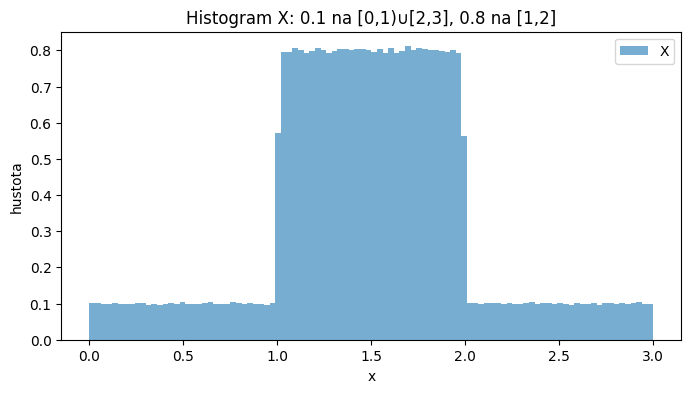

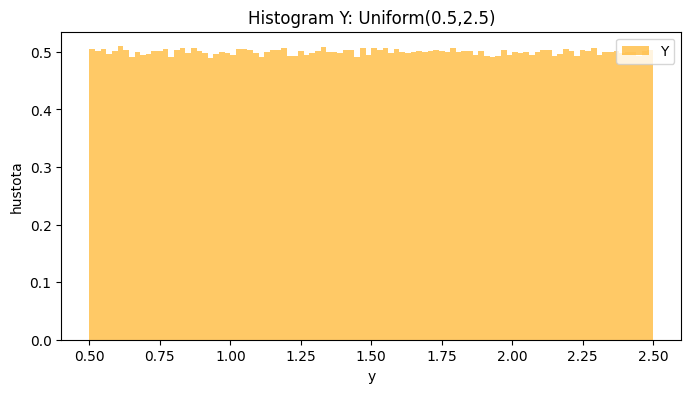

FSD test: NIE DOMINUJE, prvé porušenie FSD pri x = 0.00


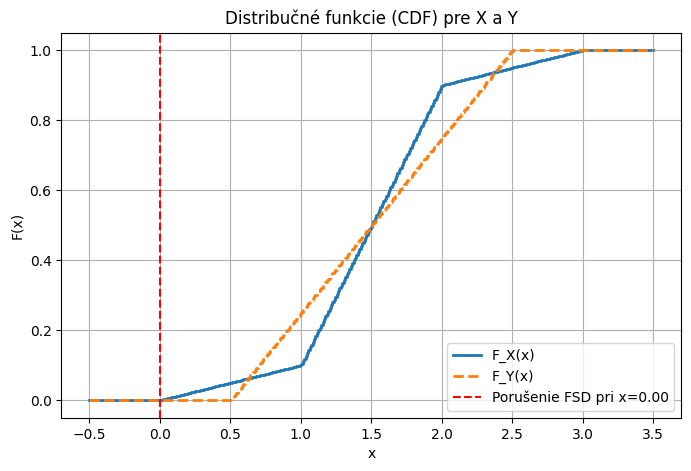

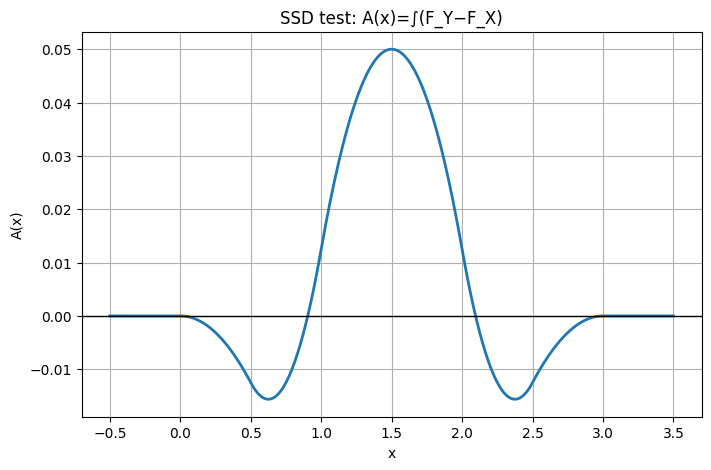

SSD test: Porušenie X SSD-dom over Y pri x=0.00 (A(x)<0).
SSD test: Porušenie Y SSD-dom over X pri x=0.91 (A(x)>0).
SSD test: Žiadna jednoznačná SSD dominancia.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Počet náhodných vzoriek
N = 1_000_000

# 1) Simulácia náhodnej premennej X s hustotou
#    f_X(x)=0.1 na [0,1)∪[2,3], f_X(x)=0.8 na [1,2]
u = np.random.rand(N)
X = np.empty(N)

mask = (u < 0.1)
X[mask] = np.random.rand(mask.sum()) * 1.0

mask = (u >= 0.1) & (u < 0.9)
X[mask] = 1.0 + np.random.rand(mask.sum()) * 1.0

mask = (u >= 0.9)
X[mask] = 2.0 + np.random.rand(mask.sum()) * 1.0

# 2) Simulácia náhodnej premennej Y  Uniform(0.5, 2.5)
Y = 0.5 + 2.0 * np.random.rand(N)

# 3) Štatistiky
EX, EY       = X.mean(), Y.mean()
VarX, VarY   = X.var(ddof=1), Y.var(ddof=1)
EU_X, EU_Y   = np.log(X).mean(), np.log(Y).mean()  # utilita u(x)=ln(x)

print(f"E[X]    = {EX:.4f}, E[Y]    = {EY:.4f}")
print(f"Var(X)  = {VarX:.4f}, Var(Y)  = {VarY:.4f}")
print(f"E[ln X] = {EU_X:.4f}, E[ln Y] = {EU_Y:.4f}")

# 5) Grafy hustôt
plt.figure(figsize=(8,4))
plt.hist(X, bins=100, density=True, alpha=0.6, label="X")
plt.title("Histogram X: 0.1 na [0,1)∪[2,3], 0.8 na [1,2]")
plt.xlabel("x")
plt.ylabel("hustota")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.hist(Y, bins=100, density=True, alpha=0.6, color="orange", label="Y")
plt.title("Histogram Y: Uniform(0.5,2.5)")
plt.xlabel("y")
plt.ylabel("hustota")
plt.legend()
plt.show()

# ---- Analytické CDF a testy ----

# Vytvoríme rovnomernú mriežku x
x = np.linspace(-0.5, 3.5, 400)

#  CDF
def F_X(x):
    if x < 0:   return 0.0
    elif x < 1: return 0.1*x
    elif x < 2: return 0.8*x - 0.7
    elif x < 3: return 0.1*x + 0.7
    else:       return 1.0

def F_Y(x):
    if x < 0.5: return 0.0
    elif x <= 2.5: return (x - 0.5)/2.0
    else:       return 1.0

Fx = np.vectorize(F_X)(x)
Fy = np.vectorize(F_Y)(x)

# --- TEST FSD ---
plt.figure(figsize=(8,5))
plt.step(x, Fx, where='post', label='F_X(x)', lw=2)
plt.step(x, Fy, where='post', label='F_Y(x)', lw=2, linestyle='--')
plt.title('Distribučné funkcie (CDF) pre X a Y')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

# Überenie F_X(x) <= F_Y(x) ∀ x
diff = Fx - Fy
viol = np.where(diff > 0)[0]
if len(viol)==0:
    print("FSD test: X first-order stochastically dominates Y (F_X≤F_Y ∀x).")
else:
    xv = x[viol[0]]
    plt.axvline(xv, color='red', linestyle='--', label=f'Porušenie FSD pri x={xv:.2f}')
    print(f"FSD test: NIE DOMINUJE, prvé porušenie FSD pri x = {xv:.2f}")

plt.legend()
plt.show()

# --- TEST SSD ---
# Parciálne integrály: A(x) = ∫_{-∞}^x [F_Y(t) - F_X(t)] dt
# Ak A(x) ≥ 0 ∀x, potom X SSD-dominuje Y.
A = np.array([np.trapezoid(Fy[:i+1]-Fx[:i+1], x[:i+1]) for i in range(len(x))])

plt.figure(figsize=(8,5))
plt.plot(x, A, lw=2)
plt.axhline(0, color='black', linewidth=1)
plt.title('SSD test: A(x)=∫(F_Y−F_X)')
plt.xlabel('x')
plt.ylabel('A(x)')
plt.grid(True)
plt.show()

if np.all(A >= -1e-8):
    print("SSD test: X second-order stochastically dominates Y (A(x)≥0 ∀x).")
elif np.all(A <= 1e-8):
    print("SSD test: Y SSD-dominuje X (A(x)≤0 ∀x).")
else:
    # nájdi prvé porušenie
    i1 = np.where(A < 0)[0]
    i2 = np.where(A > 0)[0]
    if len(i1)>0:
        print(f"SSD test: Porušenie X SSD-dom over Y pri x={x[i1[0]]:.2f} (A(x)<0).")
    if len(i2)>0:
        print(f"SSD test: Porušenie Y SSD-dom over X pri x={x[i2[0]]:.2f} (A(x)>0).")
    print("SSD test: Žiadna jednoznačná SSD dominancia.")


E[X] = 95.8860,	 Var(X) = 856.5170
E[Y] = 95.5413,	 Var(Y) = 864.9805
E[log(X+1)] = 4.5178,	 E[log(Y+1)] = 4.5241
E[sqrt(X)] = 9.6611,	 E[sqrt(Y)] = 9.6614


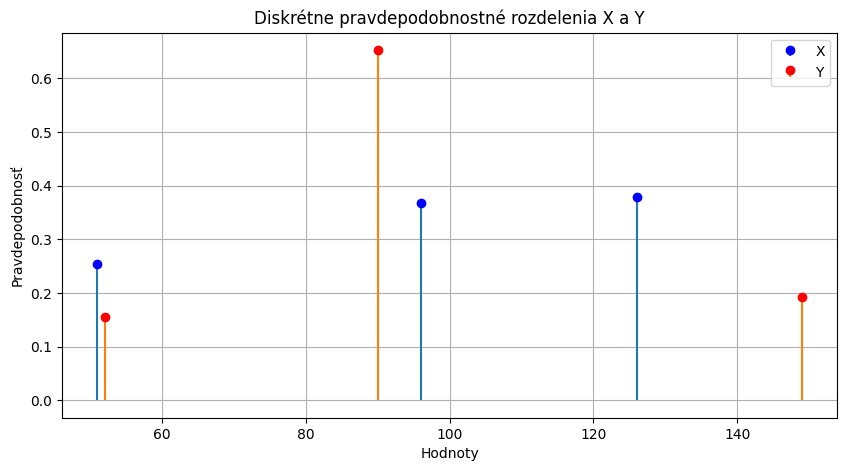

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# Diskrétne rozdelenie X
outcomes_X = np.array([51, 96, 126])
probs_X = np.array([0.2548, 0.3668, 0.3784])

# Diskrétne rozdelenie Y
outcomes_Y = np.array([149, 90, 52])
probs_Y = np.array([0.1933, 0.6524, 0.1543])

# Očakávaná hodnota a rozptyl
EX = np.sum(outcomes_X * probs_X)
EY = np.sum(outcomes_Y * probs_Y)

VarX = np.sum((outcomes_X - EX)**2 * probs_X)
VarY = np.sum((outcomes_Y - EY)**2 * probs_Y)

# Očakávaný úžitok pre konkávne funkcie
log_u_X = np.sum(np.log(outcomes_X + 1) * probs_X)
log_u_Y = np.sum(np.log(outcomes_Y + 1) * probs_Y)

sqrt_u_X = np.sum(np.sqrt(outcomes_X) * probs_X)
sqrt_u_Y = np.sum(np.sqrt(outcomes_Y) * probs_Y)

# Výpis výsledkov
print(f"E[X] = {EX:.4f},\t Var(X) = {VarX:.4f}")
print(f"E[Y] = {EY:.4f},\t Var(Y) = {VarY:.4f}")
print(f"E[log(X+1)] = {log_u_X:.4f},\t E[log(Y+1)] = {log_u_Y:.4f}")
print(f"E[sqrt(X)] = {sqrt_u_X:.4f},\t E[sqrt(Y)] = {sqrt_u_Y:.4f}")

# Grafické porovnanie hmotnostných funkcií
plt.figure(figsize=(10, 5))
plt.stem(outcomes_X, probs_X, linefmt='tab:blue', markerfmt='bo', basefmt=" ", label="X")
plt.stem(outcomes_Y, probs_Y, linefmt='tab:orange', markerfmt='ro', basefmt=" ", label="Y")
plt.title("Diskrétne pravdepodobnostné rozdelenia X a Y")
plt.xlabel("Hodnoty")
plt.ylabel("Pravdepodobnosť")
plt.legend()
plt.grid(True)
plt.show()


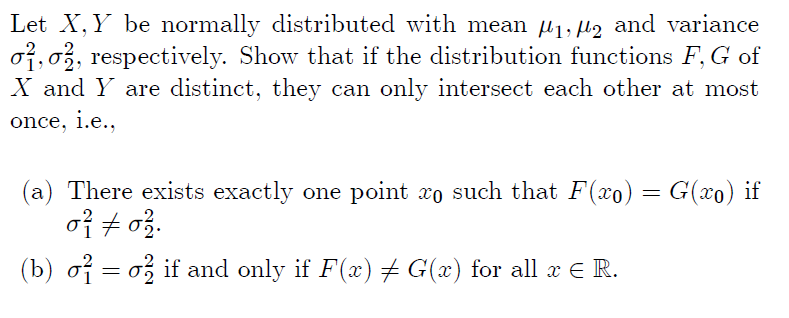

Ukážeme, že ak $$X, Y$$ sú náhodné premenné s normálnymi rozdeleniami a odlišnými rozptylmi, ich distribučné funkcie $$F, G$$ sa pretínajú nanajvýš v jednom bode.

### 1
Nech:
$$
X \sim N(\mu_1,\sigma_1^2), \quad Y \sim N(\mu_2,\sigma_2^2),
$$
pričom $$\sigma_1^2 \neq \sigma_2^2$$.

Distribučné funkcie týchto premenných sú:
$$
F(x) = \Phi\left(\frac{x - \mu_1}{\sigma_1}\right), \quad G(x) = \Phi\left(\frac{x - \mu_2}{\sigma_2}\right),
$$
kde $$\Phi$$ označuje distribučnú funkciu štandardného normálneho rozdelenia $$N(0,1)$$.

Chceme ukázať, že existuje práve jeden bod $$x_0$$, taký že:
$$
F(x_0) = G(x_0),
$$
ak $$\sigma_1^2 \neq \sigma_2^2$$.

### 2
Hľadáme riešenie rovnice:
$$
\Phi\left(\frac{x_0 - \mu_1}{\sigma_1}\right) = \Phi\left(\frac{x_0 - \mu_2}{\sigma_2}\right).
$$

Keďže $$\Phi$$ je striktne rastúca funkcia, môžeme aplikovať inverznú funkciu $$\Phi^{-1}$$ na oboch stranách rovnice:
$$
\frac{x_0 - \mu_1}{\sigma_1} = \frac{x_0 - \mu_2}{\sigma_2}.
$$

### 3
Riešime teda jednoduchú lineárnu rovnicu v $$x_0$$:
$$
\frac{x_0 - \mu_1}{\sigma_1} = \frac{x_0 - \mu_2}{\sigma_2}.
$$

Vynásobíme rovnicu $$\sigma_1 \sigma_2$$:
$$
\sigma_2(x_0 - \mu_1) = \sigma_1(x_0 - \mu_2).
$$

Roznásobením dostávame:
$$
\sigma_2 x_0 - \sigma_2 \mu_1 = \sigma_1 x_0 - \sigma_1 \mu_2.
$$

Upravíme členy s $$x_0$$ na jednu stranu rovnice:
$$
\sigma_2 x_0 - \sigma_1 x_0 = \sigma_2 \mu_1 - \sigma_1 \mu_2.
$$

Vyjadríme $$x_0$$:
$$
x_0(\sigma_2 - \sigma_1) = \sigma_2 \mu_1 - \sigma_1 \mu_2.
$$

Pretože $$\sigma_1 \neq \sigma_2$$, môžeme deliť výrazom $$(\sigma_2 - \sigma_1)$$
$$
x_0 = \frac{\sigma_2 \mu_1 - \sigma_1 \mu_2}{\sigma_2 - \sigma_1}.
$$

### 4
Vidíme, že riešenie tejto rovnice je jednoznačne určené a existuje práve jeden bod $$x_0$$.

Preto, ak platí $$\sigma_1^2 \neq \sigma_2^2$$, distribučné funkcie $$F$$ a $$G$$ sa pretínajú v presne jednom bode.

Ak $$X, Y$$ sú náhodné premenné s normálnymi rozdeleniami a $$\sigma_1^2 \neq \sigma_2^2$$, potom existuje práve jeden bod $$x_0$$, taký že platí:
$$
F(x_0) = G(x_0).
$$

To znamená, že distribučné funkcie dvoch odlišných normálnych rozdelení s rôznymi rozptylmi sa môžu pretínať nanajvýš v jednom bode.

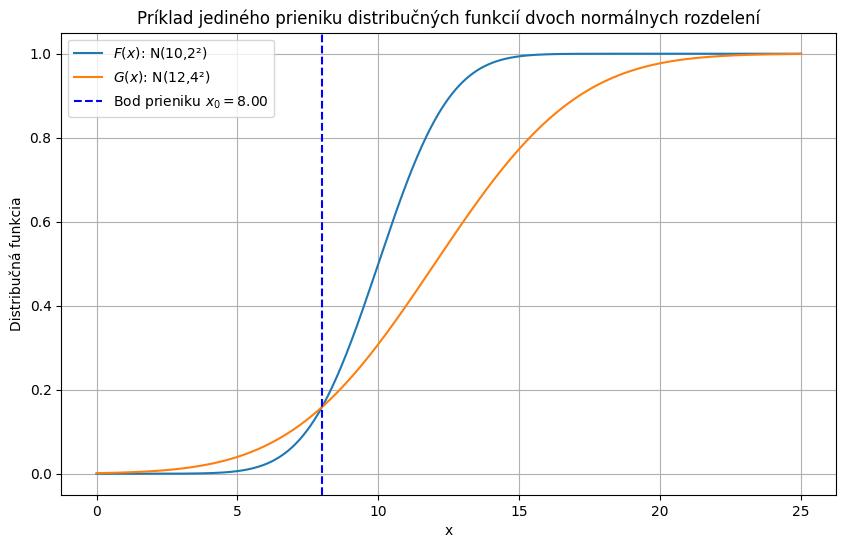

8.0

In [ ]:
mu1, sigma1 = 10, 2    # X  N(10, 2^2)
mu2, sigma2 = 12, 4    # Y  N(12, 4^2)

# Nájdeme bod prieniku distribučných funkcií
x0_small = (sigma2 * mu1 - sigma1 * mu2) / (sigma2 - sigma1)

# Oblasť vykreslenia
x_small = np.linspace(0, 25, 1000)

# Distribučné funkcie
F_small = norm.cdf(x_small, mu1, sigma1)
G_small = norm.cdf(x_small, mu2, sigma2)

# Vykreslíme graf
plt.figure(figsize=(10, 6))
plt.plot(x_small, F_small, label=f'$F(x)$: N({mu1},{sigma1}²)')
plt.plot(x_small, G_small, label=f'$G(x)$: N({mu2},{sigma2}²)')
plt.axvline(x=x0_small, color='blue', linestyle='--', label=f'Bod prieniku $x_0 = {x0_small:.2f}$')
plt.xlabel('x')
plt.ylabel('Distribučná funkcia')
plt.title('Príklad jediného prieniku distribučných funkcií dvoch normálnych rozdelení')
plt.legend()
plt.grid(True)
plt.show()

x0_small


# Tvrdenie

Pre dve náhodné premenné  
$$
X \sim N(\mu_1,\sigma_1^2),
\quad
Y \sim N(\mu_2,\sigma_2^2)
$$  
platí:
$$
\sigma_1^2 = \sigma_2^2
\quad\Longleftrightarrow\quad
F(x)\neq G(x)\quad\text{pre všetky }x\in\mathbb{R},
$$
kde  
$$
F(x)=\Phi\!\Bigl(\tfrac{x-\mu_1}{\sigma_1}\Bigr),
\quad
G(x)=\Phi\!\Bigl(\tfrac{x-\mu_2}{\sigma_2}\Bigr).
$$

---

## Dôkaz

### (⇒) Predpoklad: $$\sigma_1^2 = \sigma_2^2$$

1. Keď majú obe normálky rovnaký rozptyl $$\sigma^2$$ a $$\mu_1\neq\mu_2$$,  
   potom
   $$
   X\sim N(\mu_1,\sigma^2),
   \quad
   Y\sim N(\mu_2,\sigma^2)
   $$
   sú iba posunuté verzie tej istej „šírky“.
2. Ich distribučné funkcie sú
   $$
   F(x)=\Phi\!\Bigl(\tfrac{x-\mu_1}{\sigma}\Bigr),
   \quad
   G(x)=\Phi\!\Bigl(\tfrac{x-\mu_2}{\sigma}\Bigr).
   $$
3. Pretože $$\mu_1\neq\mu_2$$, tieto dve posunuté CDF **nemôžu mať žiadny spoločný bod** $$x$$; v každom $$x$$ totiž
   $$\tfrac{x-\mu_1}{\sigma}\neq\tfrac{x-\mu_2}{\sigma}$$
   ⇒ $$\Phi(\dots)\neq\Phi(\dots)$$.
4. Smernica (⇒) je dokázaná:  
   $$
   \sigma_1^2=\sigma_2^2
   \;\Longrightarrow\;
   F(x)\neq G(x)\ \forall x.
   $$

---

### (⇐) Predpoklad: $$F(x)\neq G(x)\ \forall x$$

1. Predpokladajme sporne, že $$\sigma_1^2\neq\sigma_2^2$$.
2. Z predchádzajúcej úlohy vieme, že ak $$\sigma_1^2\neq\sigma_2^2$$, ich CDF **sa pretína** v **práve jednom** bode.
3. To však **kontradikuje** tvrdeniu, že $$F(x)\neq G(x)$$ **pre všetky** $$x$$.
4. Preto sme museli mať $$\sigma_1^2=\sigma_2^2$$.

---

## Záver

Pre dve normálne rozdelenia platí
$$
\sigma_1^2 = \sigma_2^2
\quad\Longleftrightarrow\quad
F(x)\neq G(x)\quad\text{pre všetky }x\in\mathbb{R}.
$$


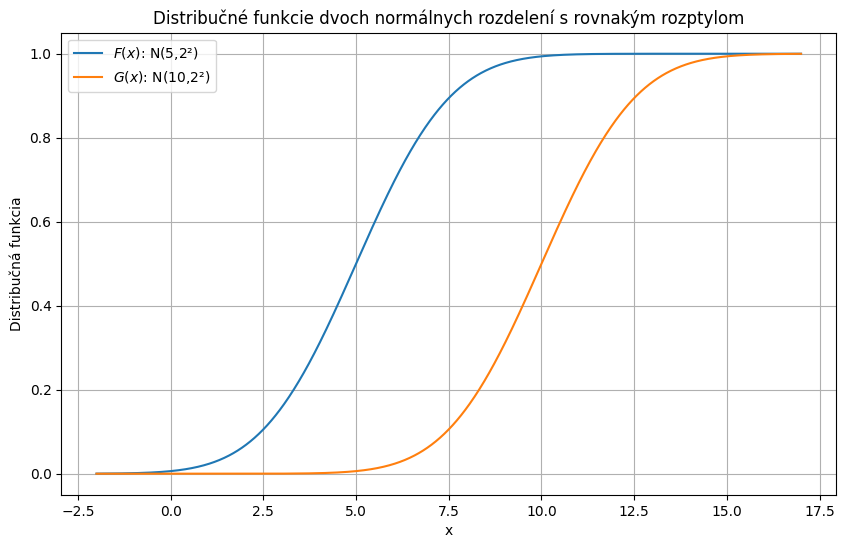

In [ ]:
# Dve normálne rozdelenia s rovnakým rozptylom, ale rôznymi strednými hodnotami

# Parametre rozdelení
mu1_same_var, sigma_same = 5, 2  # X  N(5, 2^2)
mu2_same_var, sigma_same = 10, 2 # Y  N(10, 2^2)

# Oblasť vykreslenia
x_same = np.linspace(-2, 17, 1000)

# Distribučné funkcie
F_same = norm.cdf(x_same, mu1_same_var, sigma_same)
G_same = norm.cdf(x_same, mu2_same_var, sigma_same)

# Vykreslenie
plt.figure(figsize=(10, 6))
plt.plot(x_same, F_same, label=f'$F(x)$: N({mu1_same_var},{sigma_same}²)')
plt.plot(x_same, G_same, label=f'$G(x)$: N({mu2_same_var},{sigma_same}²)')
plt.xlabel('x')
plt.ylabel('Distribučná funkcia')
plt.title('Distribučné funkcie dvoch normálnych rozdelení s rovnakým rozptylom')
plt.legend()
plt.grid(True)
plt.show()


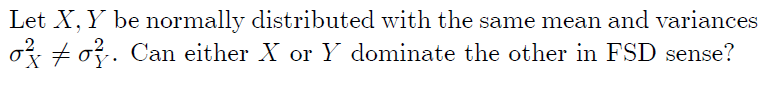

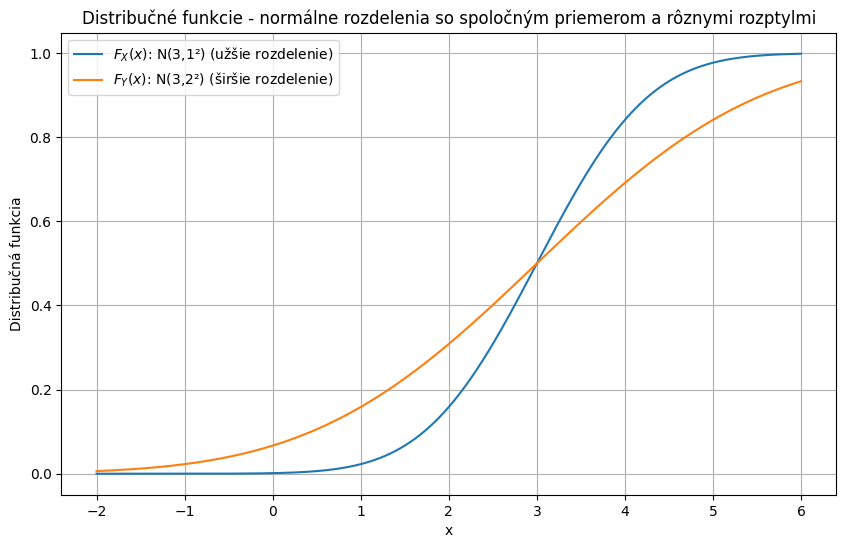

In [ ]:
# Vizualizácia FSD dominancie medzi dvoma normálnymi rozdeleniami so spoločnou strednou hodnotou a rôznymi rozptylmi

# Parametre
mu_common = 3
sigma_X = 1  # užší (menší rozptyl)
sigma_Y = 2  # širší (väčší rozptyl)

# Oblasť pre vykreslenie
x_fsd = np.linspace(-2, 6, 1000)

# Distribučné funkcie
F_X = norm.cdf(x_fsd, mu_common, sigma_X)
F_Y = norm.cdf(x_fsd, mu_common, sigma_Y)

# Vykreslenie
plt.figure(figsize=(10, 6))
plt.plot(x_fsd, F_X, label=f'$F_X(x)$: N({mu_common},{sigma_X}²) (užšie rozdelenie)')
plt.plot(x_fsd, F_Y, label=f'$F_Y(x)$: N({mu_common},{sigma_Y}²) (širšie rozdelenie)')
plt.xlabel('x')
plt.ylabel('Distribučná funkcia')
plt.title('Distribučné funkcie - normálne rozdelenia so spoločným priemerom a rôznymi rozptylmi')
plt.legend()
plt.grid(True)
plt.show()


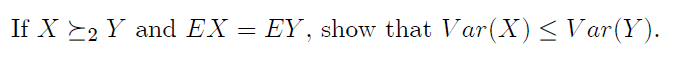

---

**Tvrdenie.**  
Ak $$X, Y$$ a $$\mathbb E[X]=\mathbb E[Y]$$, tak $$\mathrm{Var}(X)\le \mathrm{Var}(Y)$$.

---

## Dôkaz

1. **Výber vhodnej užitkovej funkcie**  
   Nech $$M$$ je číslo také, že  
   $$
     P\bigl(X\le M\bigr)=1
     \quad\text{a}\quad
     P\bigl(Y\le M\bigr)=1.
   $$  
   (Zvoľme $$M$$ väčšie ako ich vrcholy.)  
   Definujme
   $$
     u(x)\;=\; -\,(x - M)^{2}.
   $$
   Potom  
   - $$u''(x)=-2<0$$ ⇒ $$u$$ je **konkávna**.  
   - $$u'(x)=-2(x-M)\ge0$$ na celom podpornom intervale $$(-\infty,\,M]$$ ⇒ $$u$$ je **neklesajúca** tam, kde $$X,Y$$ majú hmotnosť.  
   Teda $$u\in U_2$$.

2. **Aplikácia SSD**  
   Zo znamienka druhého rádu $$\bigl(X\succeq_2 Y\bigr)$$ vieme, že
   $$
     \mathbb E\bigl[u(X)\bigr]\;\ge\;\mathbb E\bigl[u(Y)\bigr].
   $$
   Vrazme do toho $$u(x)=-(x-M)^2$$:
   $$
     \mathbb E\bigl[-(X-M)^2\bigr]
     \;\ge\;
     \mathbb E\bigl[-(Y-M)^2\bigr]
     \quad\Longrightarrow\quad
     \mathbb E\bigl[(X-M)^2\bigr]
     \;\le\;
     \mathbb E\bigl[(Y-M)^2\bigr].
   $$

3. **Spojenie so štandardným rozptylom**  
   Pretože $$\mathbb E[X]=\mathbb E[Y]$$, označme túto hodnotu $$\mu$$. Potom
   $$
     \mathbb E\bigl[(X-M)^2\bigr]
     = \mathbb E\bigl[(X-\mu + \mu - M)^2\bigr]
     = \underbrace{\mathbb E\bigl[(X-\mu)^2\bigr]}_{=Var(X)}
       + (\mu - M)^2,
   $$
   a analogicky pre $$Y$$. Z toho už priamo:
   $$
     Var(X)+(\mu-M)^2
     \;\le\;
     Var(Y)+(\mu-M)^2
     \quad\Longrightarrow\quad
     Var(X)\;\le\;Var(Y).
   $$

---

E[X] = 10.00,	 E[Y] = 10.02
Var(X) = 2.24,	 Var(Y) = 12.22


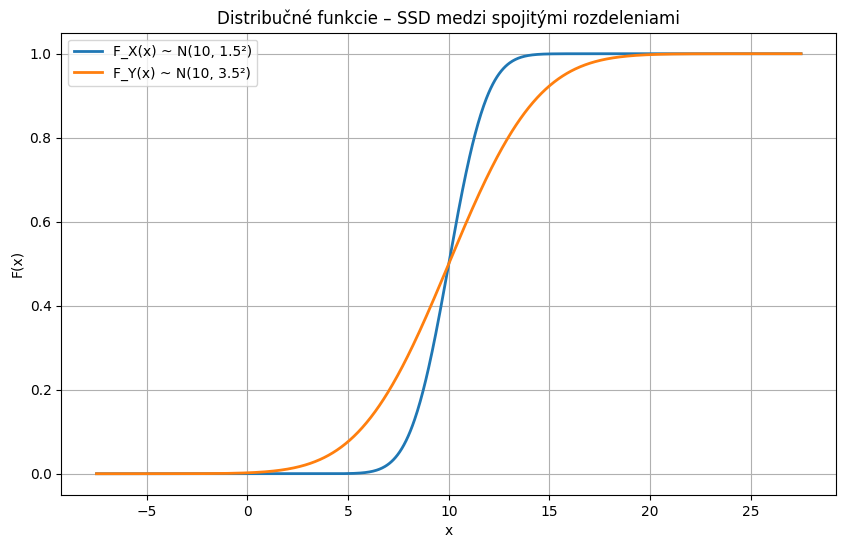

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Nastavenie dvoch normálnych rozdelení so spoločným priemerom
mu = 10
sigma_X = 1.5  # menej rozptýlené (užšie)
sigma_Y = 3.5  # viac rozptýlené (širšie)

# Vzorkovanie dát
np.random.seed(0)
X = np.random.normal(mu, sigma_X, 100_000)
Y = np.random.normal(mu, sigma_Y, 100_000)

# Výpočty
EX = np.mean(X)
EY = np.mean(Y)
VarX = np.var(X)
VarY = np.var(Y)

# Výpis hodnôt
print(f"E[X] = {EX:.2f},\t E[Y] = {EY:.2f}")
print(f"Var(X) = {VarX:.2f},\t Var(Y) = {VarY:.2f}")

# Vykreslenie distribučných funkcií
x_vals = np.linspace(mu - 5 * sigma_Y, mu + 5 * sigma_Y, 1000)
F_X = norm.cdf(x_vals, mu, sigma_X)
F_Y = norm.cdf(x_vals, mu, sigma_Y)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, F_X, label=f'F_X(x) ~ N({mu}, {sigma_X}²)', linewidth=2)
plt.plot(x_vals, F_Y, label=f'F_Y(x) ~ N({mu}, {sigma_Y}²)', linewidth=2)
plt.title("Distribučné funkcie – SSD medzi spojitými rozdeleniami")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid(True)
plt.show()
